# Stock Market API

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests

url = "https://iex.lewagon.com/stable/stock/aapl/chart/3m"
api_data = requests.get(url).json()

In [3]:
apple_df = pd.DataFrame(api_data)
apple_df.head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
0,165.21,166.32,163.82,164.59,2023-04-14,AAPL,49386480,HISTORICAL_PRICES,AAPL,,...,163.82,49386480,164.136,164.754,165.861,163.368,49386480,"Apr 14, 23",0.00,0.0000
1,165.23,165.39,164.03,165.09,2023-04-17,AAPL,41516217,HISTORICAL_PRICES,AAPL,,...,164.03,41516217,164.634,164.774,164.933,163.577,41516217,"Apr 17, 23",0.02,0.0001
2,166.47,167.41,165.65,166.10,2023-04-18,AAPL,49923008,HISTORICAL_PRICES,AAPL,,...,165.65,49923008,165.642,166.010,166.948,165.193,49923008,"Apr 18, 23",1.24,0.0075
3,167.63,168.16,165.54,165.80,2023-04-19,AAPL,47720166,HISTORICAL_PRICES,AAPL,,...,165.54,47720166,165.342,167.167,167.696,165.083,47720166,"Apr 19, 23",1.16,0.0070
4,166.65,167.87,165.56,166.09,2023-04-20,AAPL,52456377,HISTORICAL_PRICES,AAPL,,...,165.56,52456377,165.632,166.190,167.407,165.103,52456377,"Apr 20, 23",-0.98,-0.0058


- Convert the date column to a datetime object
- Set the date column as the index

In [4]:
apple_df.columns

Index(['close', 'high', 'low', 'open', 'priceDate', 'symbol', 'volume', 'id',
       'key', 'subkey', 'date', 'updated', 'changeOverTime',
       'marketChangeOverTime', 'uOpen', 'uClose', 'uHigh', 'uLow', 'uVolume',
       'fOpen', 'fClose', 'fHigh', 'fLow', 'fVolume', 'label', 'change',
       'changePercent'],
      dtype='object')

In [5]:
apple_df["date"] = pd.to_datetime(apple_df["priceDate"], format="%Y %m %d")
apple_df = apple_df.set_index("date")

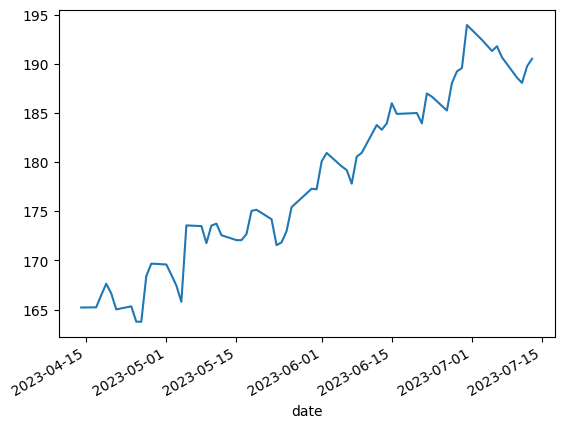

In [6]:
apple_df["close"].plot();

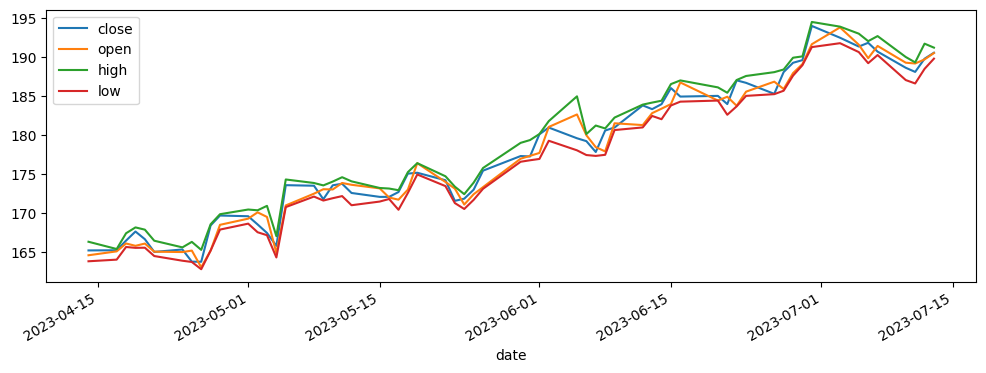

In [7]:
apple_df[["close", "open", "high", "low"]].plot(figsize=(12, 4));

In [8]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/laurameyer/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/laurameyer/code/lewagon/02-Data-Toolkit/02-Data-Sourcing/stock-market-api/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

============================== 3 passed in 0.46s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master



## (Optional) Plotting multiple line charts

In [17]:
def create_stock_df(company):
    url = f"https://iex.lewagon.com/stable/stock/{company}/chart/3m"
    api_data = requests.get(url).json()
    df = pd.DataFrame(api_data)
    df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
    df.set_index('date', inplace=True)
    df['company_code'] = company
    return df

# apple_df = create_stock_df("aapl")

In [18]:
codes = ['aapl','amzn', 'googl', 'meta']

stocks_dfs = []

for code in codes:
    stocks_dfs.append(create_stock_df(code))
    
stocks_dfs = pd.concat(stocks_dfs)
stocks_dfs.head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,company_code
date,,,,,,,,,,,,,,,,,,,,,
2023-04-14,165.21,166.32,163.82,164.59,2023-04-14,AAPL,49386480,HISTORICAL_PRICES,AAPL,,...,49386480,164.136,164.754,165.861,163.368,49386480,"Apr 14, 23",0.00,0.0000,aapl
2023-04-17,165.23,165.39,164.03,165.09,2023-04-17,AAPL,41516217,HISTORICAL_PRICES,AAPL,,...,41516217,164.634,164.774,164.933,163.577,41516217,"Apr 17, 23",0.02,0.0001,aapl
2023-04-18,166.47,167.41,165.65,166.10,2023-04-18,AAPL,49923008,HISTORICAL_PRICES,AAPL,,...,49923008,165.642,166.010,166.948,165.193,49923008,"Apr 18, 23",1.24,0.0075,aapl
2023-04-19,167.63,168.16,165.54,165.80,2023-04-19,AAPL,47720166,HISTORICAL_PRICES,AAPL,,...,47720166,165.342,167.167,167.696,165.083,47720166,"Apr 19, 23",1.16,0.0070,aapl
2023-04-20,166.65,167.87,165.56,166.09,2023-04-20,AAPL,52456377,HISTORICAL_PRICES,AAPL,,...,52456377,165.632,166.190,167.407,165.103,52456377,"Apr 20, 23",-0.98,-0.0058,aapl


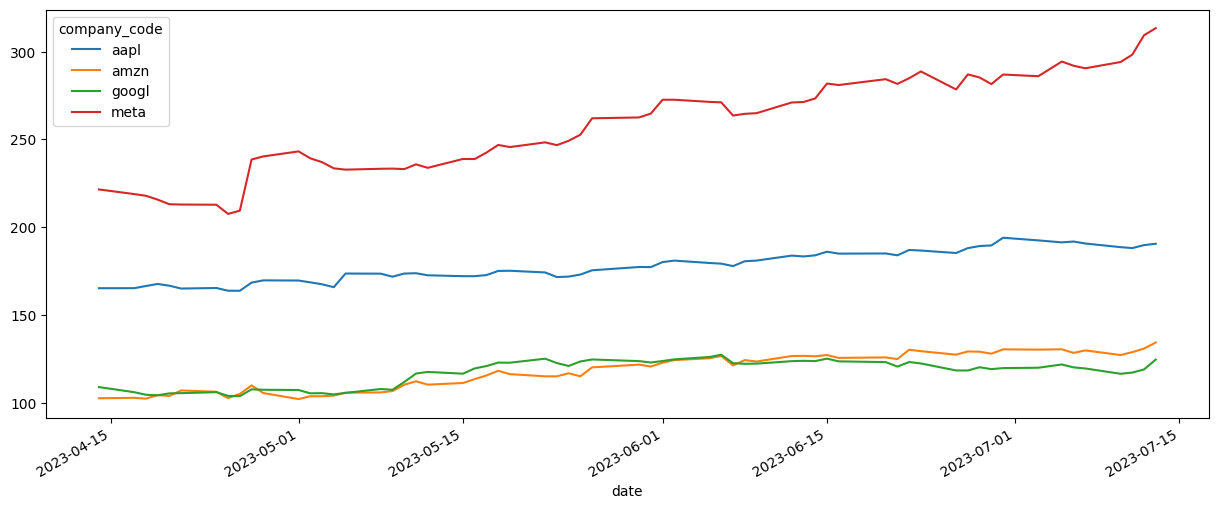

In [19]:
pivot_df = stocks_dfs.pivot(columns='company_code', values='close')
pivot_df.plot(kind='line', figsize=(15, 6));

In [21]:
pivot_df.head()

company_code,aapl,amzn,googl,meta
date,,,,
2023-04-14,165.21,102.51,108.87,221.49
2023-04-17,165.23,102.74,105.97,218.86
2023-04-18,166.47,102.30,104.50,217.89
2023-04-19,167.63,104.30,104.18,215.70
2023-04-20,166.65,103.81,105.29,213.07


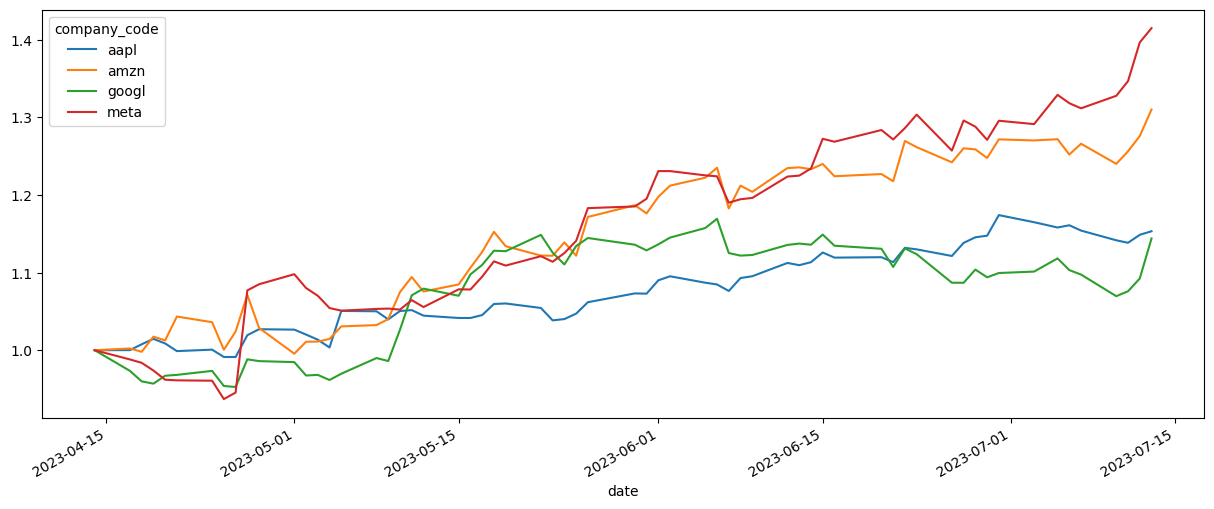

In [23]:
def normalize(series):
    return series/series[0]

normalized_pivot = pivot_df.apply(normalize, axis=0)
normalized_pivot.plot(kind='line', figsize=(15, 6));